## Import required libraries

In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

### Input files

In [2]:
chip_directory = '../../resources/macro-loc-model-deployment/L8-sample-deployment-scores/'

cement_locations = '../../resources/macro-loc-model-build/cement_exact_china_v4.1.geojson'
steel_locations = '../../resources/macro-loc-model-build/steel_exact_china_v4.1.geojson'

compiled_scores = '../../resources/macro-loc-model-deployment/L8-deployment-compiled_scores-CHN-10km-pthsh0.002.csv'

In [3]:
chip_files = []

for filename in os.listdir(chip_directory):
    if filename.startswith('L8-deployment-chip-scores'):
        chip_files.append(os.path.join(chip_directory, filename))

In [4]:
cement_gdf = gpd.read_file(cement_locations)
steel_gdf = gpd.read_file(steel_locations)

### Threshold Analysis

In [5]:
g1 = gpd.read_file(chip_files[0])
g2 = gpd.read_file(chip_files[1])
g3 = gpd.read_file(chip_files[2])

In [6]:
g_joined = pd.concat([g1, g2, g3])

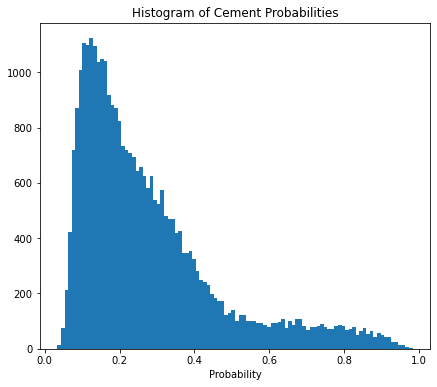

Min: 0.034011486917734146


In [7]:
plt.figure(figsize=(7,6))
plt.hist(g_joined.cement_prob.values, bins=100)
plt.title("Histogram of Cement Probabilities")
plt.xlabel("Probability")
plt.show()
print("Min:", min(g_joined.cement_prob.values))

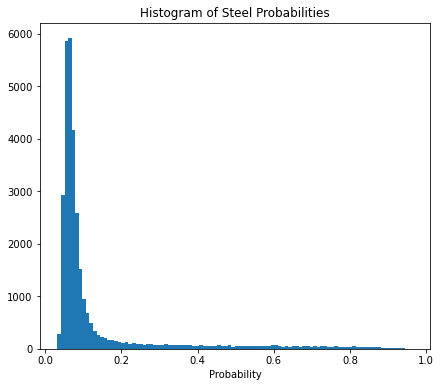

Min: 0.03266436606645584


In [8]:
plt.figure(figsize=(7,6))
plt.hist(g_joined.steel_prob.values, bins=100)
plt.title("Histogram of Steel Probabilities")
plt.xlabel("Probability")
plt.show()
print("Min:", min(g_joined.steel_prob.values))

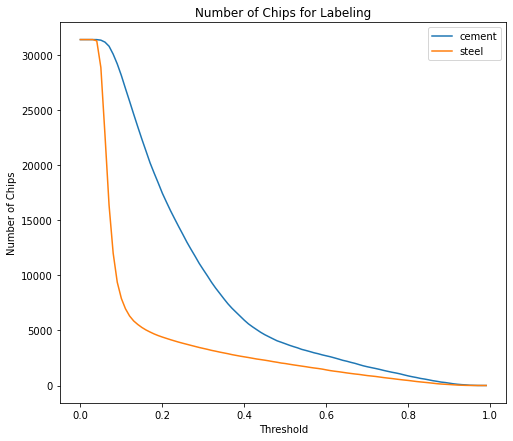

In [9]:
thresholds = [t/100 for t in range(0, 100, 1)]
cement_count = []
steel_count = []
for threshold in thresholds:
    cement_count.append(len(g_joined[g_joined.cement_prob >= threshold]))
    steel_count.append(len(g_joined[g_joined.steel_prob >= threshold]))

plt.figure(figsize=(8,7))
plt.plot(thresholds, cement_count, label='cement')
plt.plot(thresholds, steel_count, label='steel')
plt.xlabel("Threshold")
plt.ylabel("Number of Chips")
plt.title("Number of Chips for Labeling")
plt.legend()
plt.show()

In [10]:
cement_gdf = gpd.sjoin(cement_gdf, g_joined, how="inner", op='intersects').drop('steel_prob', axis=1)
steel_gdf = gpd.sjoin(steel_gdf, g_joined, how="inner", op='intersects').drop('cement_prob', axis=1)

In [11]:
cement_gdf.sort_values('cement_prob')

,uid,geometry,index_right,scene_id,tile_id,year,cement_prob
251,CHN0409,POINT (118.05496 39.87532),7892,WRS2-122032,WRS2-122032-11498,2020,0.144553
757,CHN1179,POINT (117.39216 38.64015),8071,WRS2-122033,WRS2-122033-01106,2020,0.226616
841,CHN1264,POINT (118.19577 39.85746),15313,WRS2-122032,WRS2-122032-19659,2020,0.348342
638,CHN1060,POINT (118.36626 39.91797),2301,WRS2-122032,WRS2-122032-04982,2020,0.429306
745,CHN1167,POINT (118.23689 39.95135),11695,WRS2-122032,WRS2-122032-19171,2020,0.464014
463,CHN0884,POINT (118.79984 39.75031),14612,WRS2-122032,WRS2-122032-23710,2020,0.505037
467,CHN0888,POINT (117.60614 40.52219),8539,WRS2-122032,WRS2-122032-12450,2020,0.744066
842,CHN1265,POINT (118.17958 39.87364),11691,WRS2-122032,WRS2-122032-05831,2020,0.746915
746,CHN1168,POINT (118.37673 39.76381),15857,WRS2-122032,WRS2-122032-10233,2020,0.789930
79,CHN0092,POINT (117.12836 39.27737),5746,WRS2-122033,WRS2-122033-15663,2020,0.814659


In [12]:
steel_gdf.sort_values('steel_prob')

,uid,geometry,index_right,scene_id,tile_id,year,steel_prob
35,CHN0038,POINT (117.59281 40.51165),4889,WRS2-122032,WRS2-122032-02872,2020,0.122005
25,CHN0026,POINT (117.49930 39.03041),9346,WRS2-122033,WRS2-122033-04288,2020,0.609457
108,CHN0209,POINT (117.49930 39.03041),9346,WRS2-122033,WRS2-122033-04288,2020,0.609457
26,CHN0027,POINT (118.10579 39.53994),18702,WRS2-122032,WRS2-122032-11368,2020,0.655168
34,CHN0037,POINT (118.22286 40.21329),8302,WRS2-122032,WRS2-122032-22860,2020,0.773265
30,CHN0032,POINT (118.20981 39.71098),11350,WRS2-122032,WRS2-122032-11964,2020,0.848071
109,CHN0213,POINT (118.20589 39.80389),10293,WRS2-122032,WRS2-122032-10016,2020,0.866481
111,CHN0216,POINT (118.56026 39.97626),4209,WRS2-122032,WRS2-122032-21538,2020,0.871160
125,CHN0288,POINT (118.21517 39.64857),10857,WRS2-122032,WRS2-122032-01953,2020,0.891476
33,CHN0036,POINT (117.96592 40.16770),10879,WRS2-122032,WRS2-122032-02198,2020,0.901996


In [13]:
g_joined = g_joined[(g_joined.cement_prob >= 0.144553) | (g_joined.steel_prob >= 0.122005)]

In [14]:
gdf = gpd.read_file("../../resources/macro-loc-model-deployment/L8-known-plant-chip-scores-CHN-10km-pthsh0.002_2020.geojson")
gdf

,uid,class,cement_prob,steel_prob,year,geometry
0,CHN1174,cement,0.212835,0.023312,2020,"POLYGON ((123.46573 41.34215, 123.46579 41.351..."
1,CHN0908,cement,0.998059,0.007899,2020,"POLYGON ((100.18955 26.66447, 100.18965 26.673..."
2,CHN0726,cement,0.974288,0.014117,2020,"POLYGON ((119.25296 32.18697, 119.25319 32.196..."
3,CHN0130,cement,0.832586,0.045456,2020,"POLYGON ((104.35858 31.60376, 104.35852 31.613..."
4,CHN0999,cement,0.286820,0.022883,2020,"POLYGON ((110.83534 32.74793, 110.83533 32.757..."
...,...,...,...,...,...,...
328,CHN1259,cement,0.975478,0.022546,2020,"POLYGON ((109.02246 34.90926, 109.02224 34.918..."
329,CHN1165,cement,0.890754,0.011719,2020,"POLYGON ((114.82388 38.85616, 114.82359 38.865..."
330,CHN1108,cement,0.714976,0.013730,2020,"POLYGON ((116.07721 24.14469, 116.07715 24.154..."
331,CHN0156,cement,0.972550,0.023368,2020,"POLYGON ((117.45434 34.47028, 117.45439 34.479..."


In [15]:
cement = gdf[gdf['class'] == 'cement']
steel = gdf[gdf['class'] == 'steel']

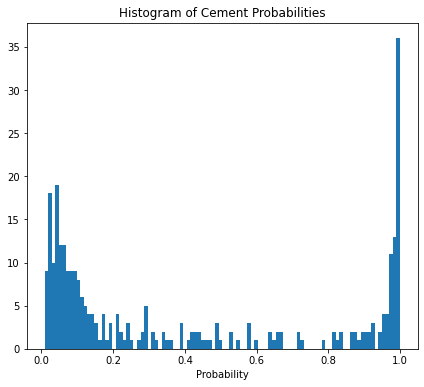

Min: 0.009004318155348301


In [16]:
plt.figure(figsize=(7,6))
plt.hist(cement.cement_prob.values, bins=100)
plt.title("Histogram of Cement Probabilities")
plt.xlabel("Probability")
plt.show()
print("Min:", min(cement.cement_prob.values))

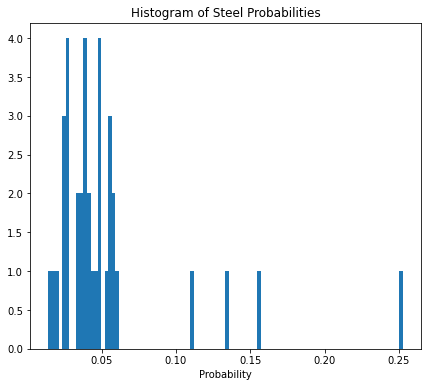

Min: 0.013912206515669823


In [17]:
plt.figure(figsize=(7,6))
plt.hist(steel.steel_prob.values, bins=100)
plt.title("Histogram of Steel Probabilities")
plt.xlabel("Probability")
plt.show()
print("Min:", min(steel.steel_prob.values))

### Compiled Scores

In [20]:
df = pd.read_csv(compiled_scores)

/opt/conda/envs/earthai/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df.head()

,tile_id,year,cement_prob,steel_prob,index,prop_rail,prop_water,preds,cement_uid,steel_uid
0,WRS2-114026-00001,2020,0.496394,0.418118,NaN,NaN,NaN,NaN,NaN,NaN
1,WRS2-114026-00002,2020,0.734526,0.073790,201194.0,0.000000,0.000047,0.003563,NaN,NaN
2,WRS2-114026-00003,2020,0.163669,0.164475,202238.0,0.000026,0.000005,0.008350,NaN,NaN
3,WRS2-114026-00004,2020,0.583468,0.286850,201191.0,0.000000,0.000022,0.002441,NaN,NaN
4,WRS2-114026-00005,2020,0.135758,0.064613,201541.0,0.000000,0.000031,0.002857,NaN,NaN


In [35]:
len(df)

3317070

In [24]:
cement_plants = df[df.cement_uid.notnull()]
steel_plants = df[df.steel_uid.notnull()]

In [32]:
cement_plants.describe()

,year,cement_prob,steel_prob,index,prop_rail,prop_water,preds
count,675.000000,675.000000,675.000000,644.000000,644.000000,644.000000,644.000000
mean,2019.226667,0.519025,0.296848,132987.947205,0.000103,0.000024,0.029564
std,0.837121,0.252361,0.275037,25113.684755,0.000122,0.000034,0.031978
min,2018.000000,0.053932,0.043213,25168.000000,0.000000,0.000000,0.002001
25%,2018.000000,0.315126,0.076763,120269.750000,0.000020,0.000004,0.007610
50%,2019.000000,0.458247,0.137134,137141.000000,0.000064,0.000015,0.019250
75%,2020.000000,0.757312,0.514793,149804.250000,0.000140,0.000031,0.038448
max,2020.000000,0.986462,0.949616,190772.000000,0.001080,0.000336,0.283785


In [48]:
steel_plants.describe()

,year,cement_prob,steel_prob,index,prop_rail,prop_water,preds
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2019.403101,0.491011,0.704280,138282.906977,0.000209,0.000022,0.057133
std,0.765663,0.233003,0.249532,25716.897262,0.000262,0.000027,0.068489
min,2018.000000,0.123579,0.067104,39415.000000,0.000000,0.000000,0.002371
25%,2019.000000,0.312991,0.583792,127170.000000,0.000063,0.000004,0.019074
50%,2020.000000,0.442046,0.821992,145633.000000,0.000131,0.000014,0.036398
75%,2020.000000,0.656385,0.881252,154679.000000,0.000289,0.000022,0.077709
max,2020.000000,0.953201,0.954781,191812.000000,0.001828,0.000145,0.479452


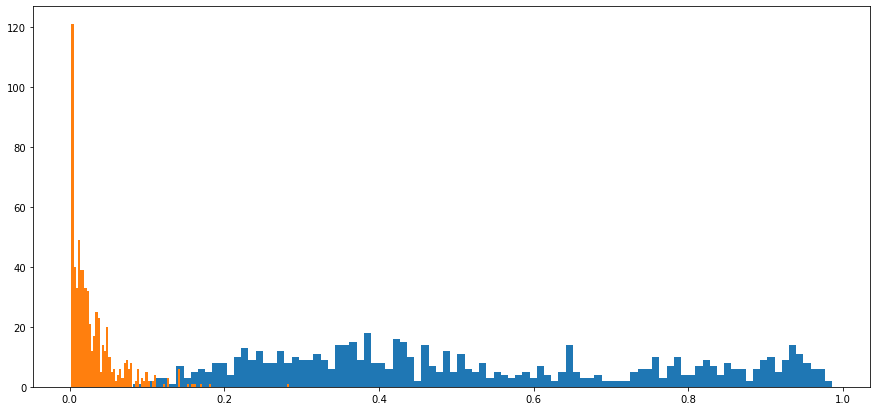

In [33]:
plt.figure(figsize=(15,7))
plt.hist(cement_plants.cement_prob, bins=100)
plt.hist(cement_plants.preds, bins=100)
plt.show()

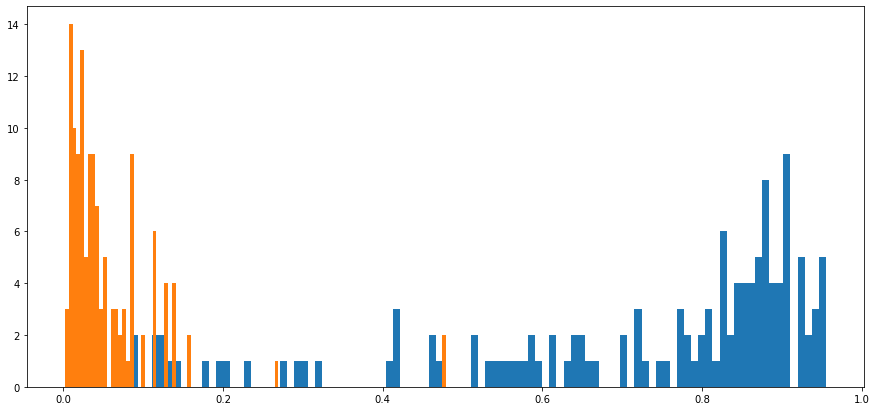

In [34]:
plt.figure(figsize=(15,7))
plt.hist(steel_plants.steel_prob, bins=100)
plt.hist(steel_plants.preds, bins=100)
plt.show()

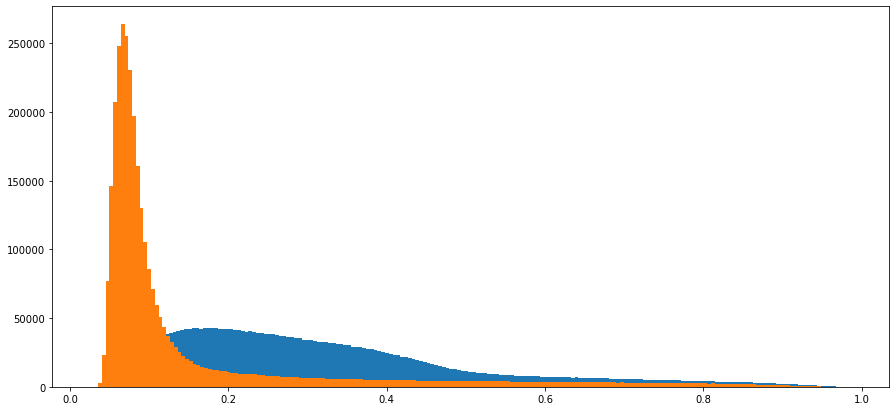

In [39]:
plt.figure(figsize=(15,7))
plt.hist(df.cement_prob, bins=200)
plt.hist(df.steel_prob, bins=200)
plt.show()

In [43]:
df.cement_prob.mean(), cement_plants.cement_prob.mean()

(0.32067266801229366, 0.5190254427878945)

In [45]:
df.cement_prob.median(), cement_plants.cement_prob.median()

(0.2796996980905533, 0.458247423171997)

In [44]:
df.steel_prob.mean(), steel_plants.steel_prob.mean()

(0.15916429320909997, 0.7042803551799567)

In [46]:
df.steel_prob.median(), steel_plants.steel_prob.median()

(0.0832771547138691, 0.8219923377037048)

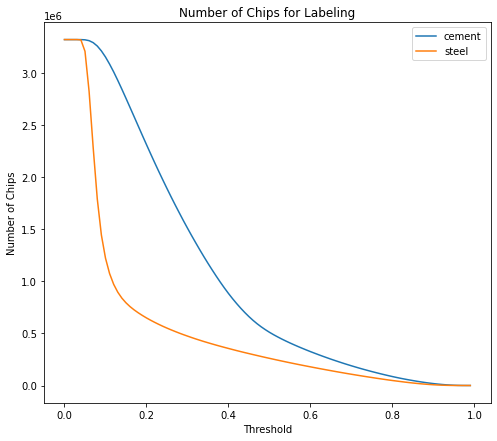

In [47]:
thresholds = [t/100 for t in range(0, 100, 1)]
cement_count = []
steel_count = []
for threshold in thresholds:
    cement_count.append(len(df[df.cement_prob >= threshold]))
    steel_count.append(len(df[df.steel_prob >= threshold]))

plt.figure(figsize=(8,7))
plt.plot(thresholds, cement_count, label='cement')
plt.plot(thresholds, steel_count, label='steel')
plt.xlabel("Threshold")
plt.ylabel("Number of Chips")
plt.title("Number of Chips for Labeling")
plt.legend()
plt.show()

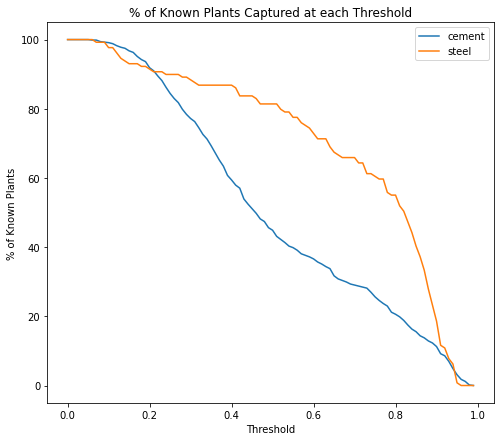

In [54]:
thresholds = [t/100 for t in range(0, 100, 1)]
cement_count = []
steel_count = []
for threshold in thresholds:
    cement_count.append((len(cement_plants[cement_plants.cement_prob >= threshold])/len(cement_plants)) * 100)
    steel_count.append((len(steel_plants[steel_plants.steel_prob >= threshold])/len(steel_plants)) * 100)

plt.figure(figsize=(8,7))
plt.plot(thresholds, cement_count, label='cement')
plt.plot(thresholds, steel_count, label='steel')
plt.xlabel("Threshold")
plt.ylabel("% of Known Plants")
plt.title("% of Known Plants Captured at each Threshold")
plt.legend()
plt.show()